# Pytania z lekcji 6

Poniżej znajduje się cena zamknięcia akcji *Apple* i *Microsoft* od 06.08.2010 do 07.08.2020.

In [1]:
import pandas as pd

stocks = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/AAPL-MSFT-ClosePrice2010-2020.csv")
stocks.head()

date  AAPL close  MSFT close
0  06/08/2010     37.1559       25.55
1  09/08/2010     37.3929       25.61
2  10/08/2010     37.0586       25.07
3  11/08/2010     35.7414       24.86
4  12/08/2010     35.9700       24.49

**Pytanie 1:**

*Wykreśl diagram punktowy z `AAPL close` na osi x i `MSFT close` na osi y z ramki DataFrame `stocks`. Widzisz jakąś korelację?*

<AxesSubplot:xlabel='AAPL close', ylabel='MSFT close'>

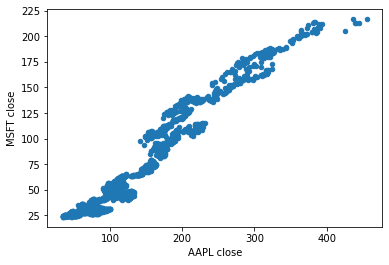

In [2]:
# Odpowiedź
stocks.plot.scatter(
    x="AAPL close",
    y="MSFT close"
)
# Widzimy kolerację pozytywną

**Pytanie 2:**

Równanie dla jednostek standaryzowanych jest poniżej:
    
${\large Jednostki\space Standaryzowane =\Large z = \frac{x-\mu}{\sigma}}$

${x = \text{Każdy element danych}}$

${\mu = \text{Średnia populacji}}$

${\sigma = \text{Odchylenie standardowe populacji}}$

*Za pomocą funkcji `.mean()` i `.std()` oblicz jednostki standaryzowane dla kolumny `MSFT close`.*

In [3]:
(stocks["MSFT close"]-stocks["MSFT close"].mean())/stocks["MSFT close"].std()

0      -0.902562
1      -0.901203
2      -0.913428
3      -0.918182
4      -0.926559
          ...   
2514    3.421208
2515    3.347632
2516    3.339709
2517    3.416907
2518    3.329295
Name: MSFT close, Length: 2519, dtype: float64

**Pytanie 3:**

Poniżej znajdują się funkcje, których użyliśmy w lekcji.

In [4]:
def standard_units(df): #df to po prostu skrót od DataFrame
    """Konwertuję zbiór danych do jednostek standaryzowanych."""
    return (df - df.mean())/df.std()

In [5]:
def correlation(df,x,y):
    """Ta funckja oblicza korelację Pearsona."""
    df_product = standard_units(df[x]) * standard_units(df[y]) 
    return df_product.mean() 

*z funkcją `correlation` oblicz korelację między `AAPL close` a `MSFT close`. Skomentuj, co oznacza ta wartość.*

In [6]:
#Odpowiedź
correlation(stocks,"AAPL close","MSFT close")
# Jeśli liczba jest dodatnia to korelacja jest pozytywna. Jesli zbliża się do 1 to korelacja jest silna.

0.970922235140214

**Pytanie 4:**

Poniżej znajdują się funkcje, których użyliśmy w lekcji.

In [7]:
def slope(df,x,y):
    """Ta funkcja oblicza nachylenie linii regresji najlepszego dopasowania"""
    r = correlation(df,x,y)
    std_ratio = df[y].std()/df[x].std()
    return r * std_ratio

In [8]:
def intercept(df,x,y):
    """Ta funkcja oblicza punkt przecięcia linii regresji"""
    mean_y = df[y].mean()
    mean_x = df[x].mean()
    gradient = slope(df,x,y)
    return mean_y - gradient*mean_x

*Za pomocą tych funkcji dla `intercept` i `slope` oblicz prognozę ceny `MSFT close`, gdy `MSFT close = 150`.*

In [9]:
#Answer
150*slope(stocks,"AAPL close","MSFT close")+intercept(stocks,"AAPL close","MSFT close")

78.77375233152081

**Pytanie 5:**

Poniżej znajduje się funkcja przewidywania, której użyliśmy w lekcji.

In [10]:
def predict(df,x,y):
    c = intercept(df,x,y)
    m = slope(df,x,y)
    input_string = "Wejście " + x + ": "
    input_x = int(input(input_string))
    return round(input_x*m+c)

*Umieść funkcję `predict()` w pętli `for`, która powtarza się 3 razy, i przewiduj wartość `AAPL close`, gdy `MSFT close = 50, 200 i 250`. Będziesz musiał(a) ustawić `AAPL close` jako y i `MSFT close` jako x.*

In [11]:
#Odpowiedzi
for y in range(3):
    print(predict(stocks,"MSFT close","AAPL close"))

#103,342,422

Wejście MSFT close: 50
103
Wejście MSFT close: 200
342
Wejście MSFT close: 250
422
